# Face Detection with OpenCV

Face detection can be regarded as a specific case of object-class detection. In object-class detection, the task is to find the locations and sizes of all objects in an image that belong to a given class. Examples include upper torsos, pedestrians, and cars.Face-detection algorithms focus on the detection of frontal human faces. 

## OpenCV 

OpenCV provides two face detection classifier which can be loaded as xml and can be used to classify face in a digital image. Both techniques use gray scale image image as we dont need color information to detect a face in an image. Two classifiers include:
- Haar Classifier
- Local Binary Patterns (LBP) Classifier

## Haar Classifier

Haar Classifier identifes Haar like features in digital image like line features, edge features, center surround features. Each window is placed on the picture to calculate a single feature. This feature is a single value obtained by subtracting the sum of pixels under the white part of the window from the sum of the pixels under the black part of the window. Irrelevant features are discarded using Adaboost.

## LBP Classifier 

For each block, LBP looks at 9 pixels (3×3 window) at a time, and with a particular interest in the pixel located in the center of the window.

Then, it compares the central pixel value with every neighbor's pixel value under the 3×3 window. For each neighbor pixel that is greater than or equal to the center pixel, it sets its value to 1, and for the others, it sets them to 0.

After that, it reads the updated pixel values (which can be either 0 or 1) in a clockwise order and forms a binary number. Next, it converts the binary number into a decimal number, and that decimal number is the new value of the center pixel. We do this for every pixel in a block. Then, it converts each block values into a histogram, so now we have gotten one histogram for each block in an image. Finally, it concatenates these block histograms to form a one feature vector for one image, which contains all the features we are interested. So, this is how we extract LBP features from a picture.

### Face detection using Haar Classifer 

Haar classifier is known to be more accurate though it trains slow. Since opencv reads image in BGR we convert it to gray scale for face detection

In [2]:
import cv2 
import matplotlib.pyplot as plt

In [3]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
def convertToGrayScale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

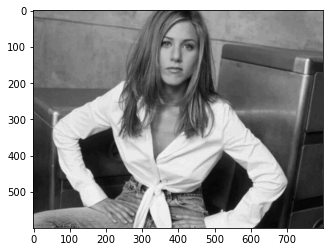

In [5]:
test_image = cv2.imread('Images/test-data/rachelgreen.jpg')
test_image_gray = convertToGrayScale(test_image)
plt.imshow(test_image_gray, cmap='gray')

The haar frontal face cascade classifier is loaded from xml available with opencv. detectMultiscale will detect faces and return a list of position in Rect(a,b,c,d) form

In [6]:
haar_face_cascade = cv2.CascadeClassifier('C:/Users/danush.gokul/AppData/Local/Continuum/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_alt.xml')
faces = haar_face_cascade.detectMultiScale(test_image_gray, scaleFactor=1.1, minNeighbors=5);
print('Faces found: ', len(faces))

Faces found:  1


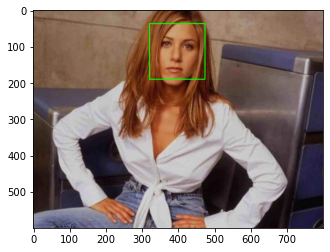

In [7]:
for (x, y, w, h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(convertToRGB(test_image))

In [8]:
def detect_faces(cascade_function, image_BGR, scale_factor=1.1):
    image_copy = image_BGR.copy()
    gray_image = convertToGrayScale(image_copy)
    faces = cascade_function.detectMultiScale(gray_image, scaleFactor=scale_factor, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image_copy

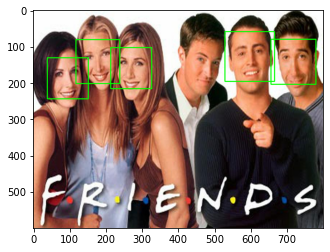

In [9]:
test_image = cv2.imread('Images/test-data/friends-cast-2.jpg')
faces = detect_faces(haar_face_cascade, test_image, 1.3)
plt.imshow(convertToRGB(faces))

## References

- https://www.superdatascience.com/blogs/opencv-face-detection
- https://en.wikipedia.org/wiki/Face_detection